Automatically created module for IPython interactive environment


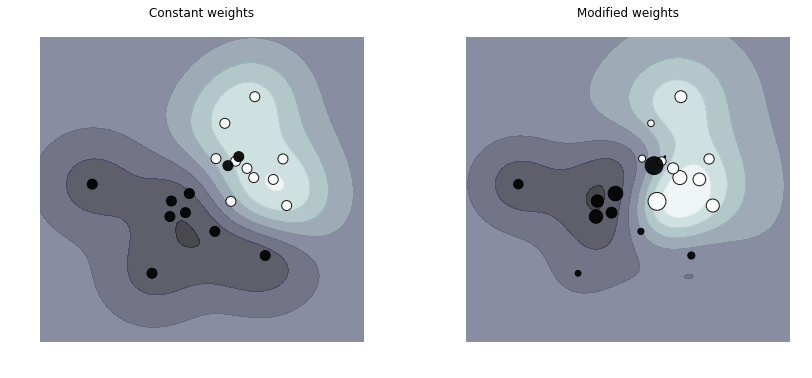

[[-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [ 1.23029068  1.20237985]
 [ 2.76405235  1.40015721]
 [ 1.97873798  3.2408932 ]
 [ 2.86755799  0.02272212]
 [ 0.89678115  1.4105985 ]
 [ 1.14404357  2.45427351]
 [ 1.76103773  1.12167502]
 [ 1.44386323  1.33367433]
 [ 1.3130677   0.14590426]]
[10 11 12 13 14 15 16 18  0  1  2  4  5  6  7  9]
[8 8]


In [55]:
%matplotlib inline

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=Y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
pt = 10
np.random.seed(0)
X = np.r_[np.random.randn(pt, 2) + [1, 1], np.random.randn(pt, 2)]   
Y = [1] * pt + [-1] * pt
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15



# for reference, first fit without class weights

# fit the model
C = 1 #SVM regularization
clf_weights = svm.SVC(kernel='rbf', C=C)
clf_weights.fit(X, Y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(kernel='rbf', C=C)
clf_no_weights.fit(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()


#print(X)
#print(Y)
print(clf_weights.support_vectors_)  # print the support vectors
print(clf_weights.support_)  #print the support vectors index
print(clf_weights.n_support_) # print the support vector counts by class